### 워드 클라우드(word cloud)
- 텍스트 데이터를 시각화하여 각 단어의 빈도(or 중요도)에 따라 단어의 크기를 다르게 표현하는 기법

**[과정]**
1. 텍스트 전처리
2. 단어 빈도 계산
3. 단어 크기 결정
4. 단어 배치
5. 시각화

<img src='https://www.glowbl.com/blog/wp-content/uploads/2024/07/Visuel-nuage-de-mots-2-800x450.png' />

In [1]:
!pip install wordcloud

In [2]:
!pip install fonts

#### 데이터 준비
- gdown : 구글 드라이브에서 데이터 다운로드할 수 있게 해주는 라이브러리 

In [3]:
!pip install gdown

In [4]:
# 텍스트 데이터 받아오기
import gdown # 구글 드라이브에서 파일 다운로드하는 라이브러리

url = 'https://drive.google.com/uc?id=1OliDPP_KcCM8_RS8YL_NK2yaHYtQaedf'  # 구글 드라이브 파일 URL
output = 'sms_spam.csv' # 저장할 파일 이름
    
gdown.download(url, output)


Downloading...
From: https://drive.google.com/uc?id=1OliDPP_KcCM8_RS8YL_NK2yaHYtQaedf
To: d:\PlayDataStudy\07_nlp\02_preprocessing\sms_spam.csv
100%|██████████| 33.7M/33.7M [00:01<00:00, 27.6MB/s]


'sms_spam.csv'

### 텍스트 전처리

In [22]:
import numpy as np
import pandas as pd
from konlpy.tag import Okt # 한국어 형태소 분석기
from collections import Counter # 단어 빈도 계산 라이브러리
from wordcloud import WordCloud # 워드클라우드 생성 라이브러리
import matplotlib.pyplot as plt # 시각화 라이브러리

In [6]:
spam_df = pd.read_csv('sms_spam.csv')
spam_df.head() # 데이터 형태 확인

SEQ                                                 CN
0  842298  [Web발신]ifg@(광고)[한음대리점 율량점] 류태자 단골고객님ifg@ifg@마지...
1  842299  [Web발신]ifg@(광고)[전자랜드중동점]ifg@최은순 고객님!ifg@전자랜드 *...
2  842300  제목 : (광고)현대미아점 통합ifg@▶*O,OOO원할인권◀도착ifg@현대미아 설화...
3  842301  [Web발신]ifg@(광고) 신세계면세점 명동점ifg@ifg@본 문자 수신 고객님께...
4  842302  [Web발신]ifg@(광고) 롯데마트 소중한 집사의 통장을 지켜라! 멍이도 냥이도 ...

In [7]:
# 대상 데이터 추출
corpus = spam_df['CN'][0] # 첫 번째 문자 데이터 추출
print(corpus) # 문자 데이터 확인

[Web발신]ifg@(광고)[한음대리점 율량점] 류태자 단골고객님ifg@ifg@마지막 최대할인입니다!!!!!!!ifg@SKT SKT SKT 기기변경 기기변경 ifg@ifg@▶▶▶▶▶Z플립* ***G◀◀◀◀◀ifg@☞☞☞☞공시지원금 기준☜☜☜☜ifg@ifg@기기값 : *,***,***원ifg@ifg@공시지원금 : -***,***원ifg@매장추가지원금 : -***,***원 ifg@ifg@★★★구매금액 : **,***원★★★ifg@ifg@***G 대용량 저장공간이라 오래오래 사용하실 수 있습니다!!!!ifg@극소량으로 조기종료가능성 있습니다ifg@ifg@▶ 단골이라서 더 드림 혜택 자세히 보기(SKT 공식 대리점 홈페이지로 연결) ifg@http://dangol.t-mms.kr/dt.do?m=*********&u=tworldfriends.co.kr/D*********ifg@ifg@(무료ARS)수신거부 및 단골해지 : ifg@***-***-****


In [8]:
okt = Okt() # Okt 형태소 분석기 객체 생성

# nouns(): 명사 추출 메서드
tokens = okt.nouns(corpus)  # 문자 데이터에서 명사 토큰화
print(tokens) 

['발신', '광고', '한음', '대리점', '율량점', '류태자', '단골', '고객', '마지막', '최대', '할인', '기기', '변경', '기기', '변경', '플립', '원금', '기준', '기기', '값', '원', '원금', '원', '매장', '추가', '원금', '원', '구매', '금액', '원', '용량', '장공', '오래오래', '사용', '수', '소량', '조기', '종료', '가능성', '단골', '더', '드림', '혜택', '보기', '공식', '대리점', '홈페이지', '연결', '무료', '수신', '거부', '및', '단골', '해지']


In [9]:
word_count = Counter(tokens)  # 단어 빈도 계산
print(word_count)  # 단어 빈도 출력

Counter({'원': 4, '단골': 3, '기기': 3, '원금': 3, '대리점': 2, '변경': 2, '발신': 1, '광고': 1, '한음': 1, '율량점': 1, '류태자': 1, '고객': 1, '마지막': 1, '최대': 1, '할인': 1, '플립': 1, '기준': 1, '값': 1, '매장': 1, '추가': 1, '구매': 1, '금액': 1, '용량': 1, '장공': 1, '오래오래': 1, '사용': 1, '수': 1, '소량': 1, '조기': 1, '종료': 1, '가능성': 1, '더': 1, '드림': 1, '혜택': 1, '보기': 1, '공식': 1, '홈페이지': 1, '연결': 1, '무료': 1, '수신': 1, '거부': 1, '및': 1, '해지': 1})


In [10]:
ko_stopwords = ['및', '더', '수'] # 한국어 불용어 리스트

# 불용어 제거
word_count = {word: count for word, count in word_count.items() if word not in ko_stopwords}
print(word_count)  # 불용어 제거 후 단어 빈도 출력

{'발신': 1, '광고': 1, '한음': 1, '대리점': 2, '율량점': 1, '류태자': 1, '단골': 3, '고객': 1, '마지막': 1, '최대': 1, '할인': 1, '기기': 3, '변경': 2, '플립': 1, '원금': 3, '기준': 1, '값': 1, '원': 4, '매장': 1, '추가': 1, '구매': 1, '금액': 1, '용량': 1, '장공': 1, '오래오래': 1, '사용': 1, '소량': 1, '조기': 1, '종료': 1, '가능성': 1, '드림': 1, '혜택': 1, '보기': 1, '공식': 1, '홈페이지': 1, '연결': 1, '무료': 1, '수신': 1, '거부': 1, '해지': 1}


### WordCloud 객체 생성

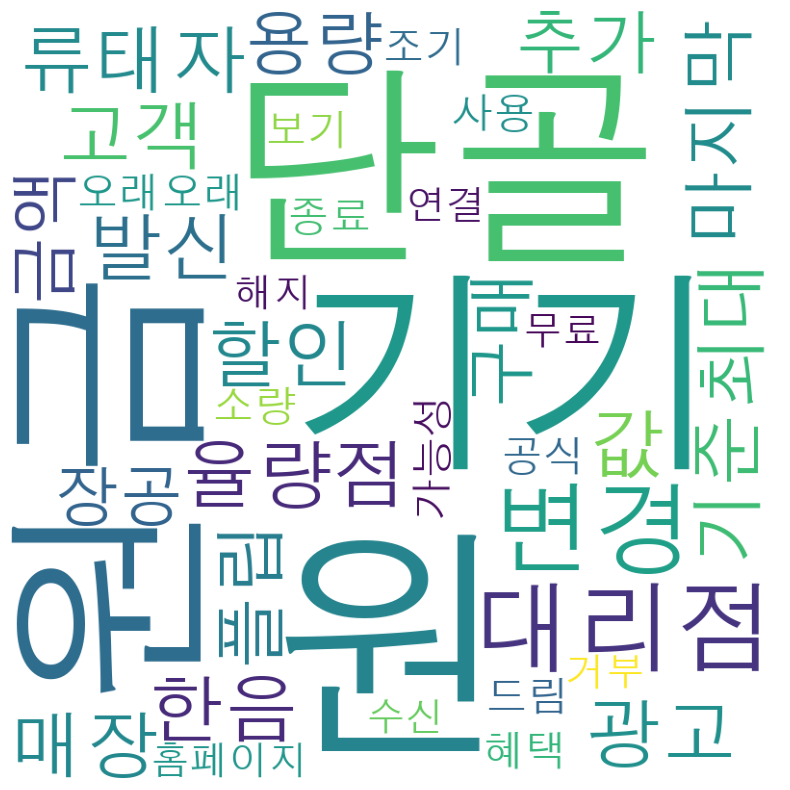

In [11]:
wordcloud = WordCloud(
    width=800,  # 너비
    height=800,  # 높이
    background_color='white',  # 배경 색상
    font_path='C:/Windows/Fonts/H2GTRM.TTF' # 한글 폰트 경로
).generate_from_frequencies(word_count) # 단어 빈도 기반 워드클라우드 생성

# 워드클라우드 시각화
plt.figure(figsize=(10, 10)) # 그래프 크기 설정
plt.imshow(wordcloud ) # 워드클라우드 이미지 표시
plt.axis('off') # 축 제거
plt.show() # 그래프 출력
# 결과 : 의미 있는 단어들이 워드클라우드에 잘 반영됨

### 전처리 없이 WordCloud

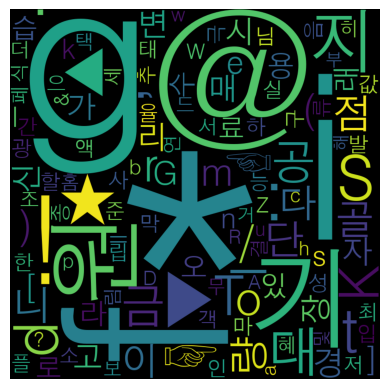

In [12]:
text = spam_df['CN'][0]  # 첫 번째 문자 데이터 추출 
word_count = Counter(text)   # 단어 빈도 계산
wordcloud = WordCloud(
    width=800,
    height=800, 
    font_path='C:/Windows/Fonts/H2GTRM.TTF' # 한글 폰트 경로
).generate_from_frequencies(word_count)  # 단어 빈도 기반 워드클라우드 생성

plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# 결과 : 의미없는 문자들이 많이 포함된 것을 확인할 수 있음

### 전체 corpus로 WordCloud를 그려보기 !

In [13]:
corpus = spam_df['CN'] # 문자 데이터 전체 추출
corpus.info()

<class 'pandas.core.series.Series'>
RangeIndex: 29588 entries, 0 to 29587
Series name: CN
Non-Null Count  Dtype 
--------------  ----- 
29588 non-null  object
dtypes: object(1)
memory usage: 231.3+ KB


In [18]:
okt = Okt() # Okt 형태소 분석기 객체 생성
nouns = [] # 명사 토큰을 저장할 리스트

for corpus_temp in corpus: # (약 2만9천개)
    tokens = okt.nouns(corpus_temp)  # 문자 데이터에서 명사 토큰화
    nouns.extend(okt.nouns(corpus_temp))  # 토큰을 리스트에 추가
    
print(nouns[:10])  # 토큰화된 명사 일부 출력 

['발신', '광고', '한음', '대리점', '율량점', '류태자', '단골', '고객', '마지막', '최대']


In [26]:
word_count = Counter(nouns)  # 단어 빈도 계산
print(word_count)  # 단어 빈도 출력

ko_stopwords = ['은','는','이','가','및', '더', '수'] # 한국어 불용어 리스트

word_count = {word: count for word, count in word_count.items() if word not in ko_stopwords}

Counter({'원': 73117, '시': 42435, '만원': 40255, '혜택': 37313, '월': 35426, '증정': 35200, '고객': 33549, '일': 32982, '할인': 30235, '무료': 28284, '구매': 27228, '발신': 26353, '광고': 25446, '수': 21114, '거부': 19429, '행사': 18626, '수신': 18229, '보험': 16725, '이벤트': 15859, '추가': 15801, '쿠폰': 15460, '이상': 15151, '최대': 15122, '및': 14061, '상품권': 13739, '기간': 13622, '년': 12357, '문의': 11578, '점': 11346, '상품': 11217, '사용': 11172, '한정': 10613, '개': 10497, '안내': 10084, '금': 10066, '상담': 9904, '가능': 9739, '매장': 9479, '만': 9399, '확인': 9370, '등': 9357, '더': 8576, '계약': 8506, '개월': 8413, '문자': 8404, '지급': 8185, '예약': 8173, '가입': 7685, '방문': 7414, '사은': 7386, '천원': 7226, '신세계': 7104, '가전': 7012, '카드': 6938, '후': 6887, '라이브': 6745, '참여': 6632, '특': 6583, '구독': 6430, '제공': 6410, '팩': 6368, '품': 6308, '갤럭시': 6138, '대상': 6038, '회': 6019, '센터': 5995, '금액': 5972, '기준': 5933, '위': 5851, '선착순': 5821, '한우': 5666, '바로': 5521, '포인트': 5515, '단독': 5498, '삼성': 5379, '특별': 5361, '개통': 5320, '종료': 5280, '내': 5240, '여름': 5221, '제품': 522

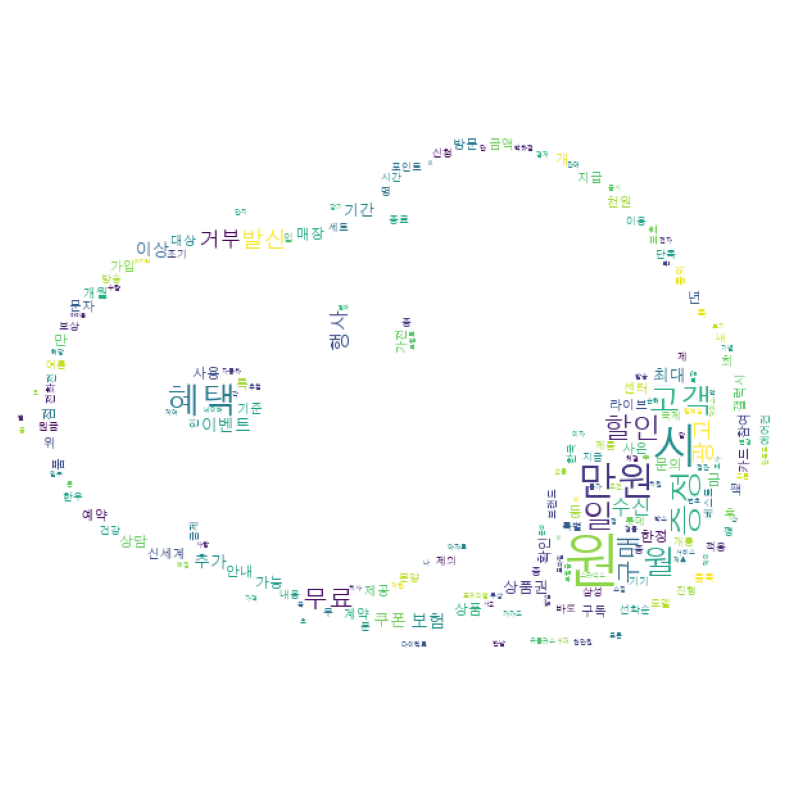

In [ ]:
from PIL import Image # 이미지 처리 라이브러리
mask_image = np.array(Image.open('sample_img.jpg')) # 마스크 이미지 불러 오기
# 이미지가 흰색일 경우 단어가 보이지 않을 수 있으니 주의

wordcloud = WordCloud(
    width=800,
    height=600,
    background_color='white',
    mask=mask_image,  # 마스크 이미지 적용
    font_path='C:/Windows/Fonts/H2GTRM.TTF' # 한글 폰트 경로
).generate_from_frequencies(word_count)  # 단어 빈도 기반 워드클라우드 생성

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
wordcloud.to_file('ko_sms_spam_output.png')  # 워드클라우드 이미지 파일로 저장